# Regresión lineal múltiple

## 0. Importar librerias

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

## 1. Explorar datos

In [ ]:
produccion = pd.read_csv("https://raw.githubusercontent.com/AngelicaCaviedes/AnalisisInferencial/main/clase6/datos_produccion.csv")
produccion.head(2)

,Semana,Horas Trabajadas,Horas Descanso,Productos Terminados
0,1,42,2,"28,9"
1,2,45,3,"30,6"


Los productos terminados los van a tomar como texto, se debe limpiar!.

In [ ]:
print(produccion['Productos Terminados'].dtype)

object


In [ ]:
produccion['Productos Terminados'] = produccion['Productos Terminados'].replace(',', '.', regex=True).astype(float)
#',', '.', regex=True me ayuda a remplazar comas y puntos
#astype me ayuda a convertir los datos en flotantes, con decimales

In [ ]:
print("Tipo de datos después de la conversión:")
print(produccion['Productos Terminados'].dtype)

Tipo de datos después de la conversión:
float64


## 2. Generar modelo

In [ ]:
#Crear variables
variables_x = ["Horas Trabajadas", "Horas Descanso"]
variable_y = "Productos Terminados"

In [ ]:
# generamos la regresión lineal
modelo = LinearRegression()

modelo.fit(produccion[variables_x], produccion[variable_y])# entrenamos el modelo

print ('Coeficientes: ', modelo.coef_)
print ('Intercepción: ', modelo.intercept_)

Coeficientes:  [ 0.50309326 -0.65831795]
Intercepción:  6.459787512539879


In [ ]:
print('Ecuación del plano: y = {} * Horas Trabajadas + {} * Horas de Descanso + {}'.format(round(modelo.coef_[0], 3), round(modelo.coef_[1], 3), round(modelo.intercept_, 3)))

Ecuación del plano: y = 0.503 * Horas Trabajadas + -0.658 * Horas de Descanso + 6.46


In [ ]:
print ('Coeficiente de determinación: ', round(r2_score(produccion[variable_y], modelo.predict(produccion[variables_x])), 3))

Coeficiente de determinación:  0.796


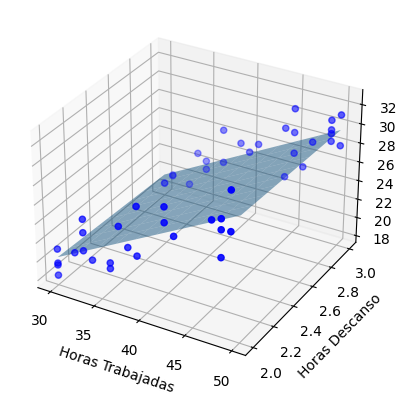

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(produccion["Horas Trabajadas"], produccion["Horas Descanso"], produccion['Productos Terminados'], color='blue')
# Crear un meshgrid para el plano
x = np.linspace(produccion["Horas Trabajadas"].min(), produccion["Horas Trabajadas"].max(), num=10)
y = np.linspace(produccion["Horas Descanso"].min(), produccion["Horas Descanso"].max(), num=10)
x, y = np.meshgrid(x, y)
# Calcular los valores z (Autos Producidos) del plano
z = modelo.intercept_ + modelo.coef_[0] * x + modelo.coef_[1] * y
# Graficar el plano
ax.plot_surface(x, y, z, alpha=0.5)
ax.set_xlabel("Horas Trabajadas")
ax.set_ylabel("Horas Descanso")
ax.set_zlabel("Autos")
plt.show()

In [ ]:
# Generar predicción

horas_trabajadas_nuevas = 15
horas_descanso_nuevas = 3

prediccion_nueva = pd.DataFrame({x1: [horas_trabajadas_nuevas], x2: [horas_descanso_nuevas]})
autos_producidos_prediccion = modelo.predict(prediccion_nueva)
print('La predicción de productos producidos para', horas_trabajadas_nuevas, 'horas trabajadas y', horas_descanso_nuevas, 'horas de descanso es', round(autos_producidos_prediccion[0], 3))

La predicción de productos producidos para 15 horas trabajadas y 3 horas de descanso es 12.031
